# Spotify Songs Exploratory Data Analysis Project

## Questions that need to answer in this analysis
- Top 5 most popular artists
- Top 5 loudest tracks
- Artist with the most danceability song
- Top 5 instrumentalness track
- Multiple feature plots
- tempo
- loudness
- acousticness
- danceability
- duration_ms
- energy
- instrumentalness 
- liveliness
- speechness
- valence

# Step-1 Import the libraries

In [69]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')

# Step-2 Load the dataset

In [13]:
# Load the dataset
df=pd.read_csv(r"C:\Users\Administrator\Downloads\data.csv")
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [18]:
# drop the unnamed Coloum
df.drop('Unnamed: 0',axis=1,inplace=True)

In [19]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


# Data Cleaning Process

In [20]:
df.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2017 non-null   float64
 1   danceability      2017 non-null   float64
 2   duration_ms       2017 non-null   int64  
 3   energy            2017 non-null   float64
 4   instrumentalness  2017 non-null   float64
 5   key               2017 non-null   int64  
 6   liveness          2017 non-null   float64
 7   loudness          2017 non-null   float64
 8   mode              2017 non-null   int64  
 9   speechiness       2017 non-null   float64
 10  tempo             2017 non-null   float64
 11  time_signature    2017 non-null   float64
 12  valence           2017 non-null   float64
 13  target            2017 non-null   int64  
 14  song_title        2017 non-null   object 
 15  artist            2017 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory

In [23]:
df.shape

(2017, 16)

In [24]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

In [25]:
len(df.columns)

16

# Summary Statistic of Data

In [26]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


# Data Analysis

## Top 5 most popular artists


In [28]:
#top_5_artist=df.groupby('artists').counts().sort_values(by='song_title',assending=False)
top_five_artist=df["artist"].groupby(df["artist"]).count().nlargest(5)
top_five_artist

artist
Drake              16
Rick Ross          13
Disclosure         12
Backstreet Boys    10
WALK THE MOON      10
Name: artist, dtype: int64

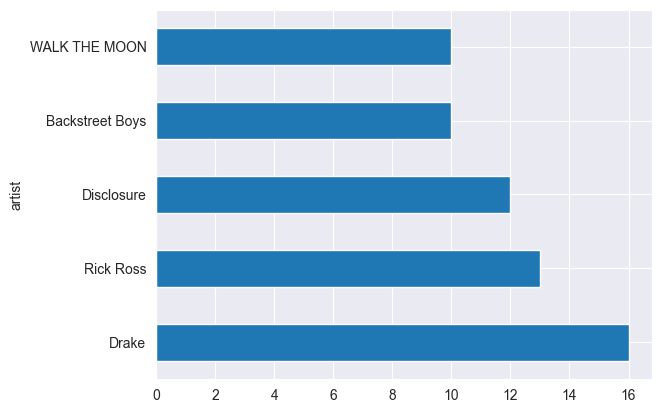

In [30]:
top_five_artist.plot.barh()
plt.show()

## Top 5 loudest tracks

In [43]:
top_5_loudest_track=df[["loudness","song_title"]].sort_values(by="loudness",ascending=True)[:5]
#top_5_loudest_track=df[["loudness","song_title"]].groupby(df["loudness"]).count().nlargest(1,5)
top_5_loudest_track

,loudness,song_title
1594,-33.097,"Lyric Pieces, Book I Op. 12: I. Arietta"
1596,-31.367,"8 Fantasiestücke, Op.12 : 1. Des Abends"
1598,-31.082,"Piano Quartet in E flat, Op.47: 3. Andante can..."
1531,-30.447,"I Was So Young, and You Were So Beautiful"
1549,-29.460,Eleanor


# Bar plot of loudness vs song title

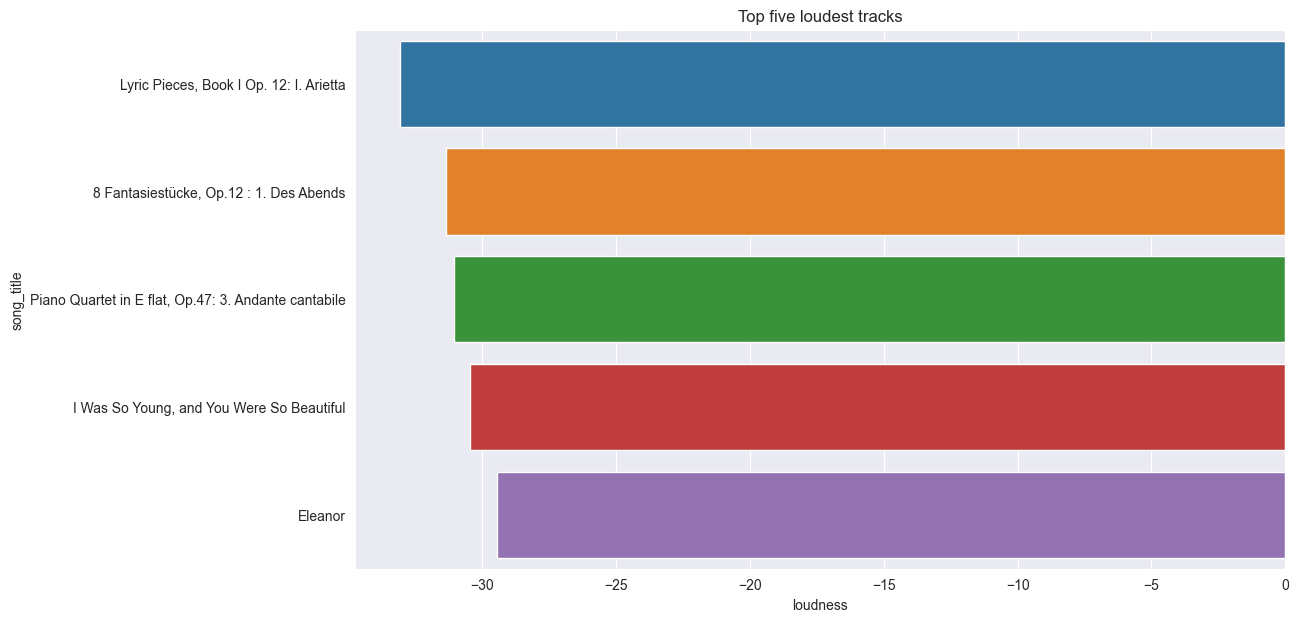

In [48]:
plt.figure(figsize=(12,7))
sns.barplot(data=top_5_loudest_track,x='loudness',y='song_title')
plt.title("Top five loudest tracks")
plt.show()

## Artist with the most danceability song

In [51]:
top_5_artist_danceability=df[["danceability","song_title","artist"]].sort_values(by="danceability",ascending=False)[:5]
top_5_artist_danceability

,danceability,song_title,artist
1433,0.984,Flashwind - Radio Edit,Ben Remember
1901,0.967,SexyBack,Justin Timberlake
604,0.962,Check Me Out Like,Blaqstarr
32,0.959,Best Friend,Young Thug
1957,0.959,Ice Ice Baby,Vanilla Ice


## Bar plot of top 5 artist with most danceability song


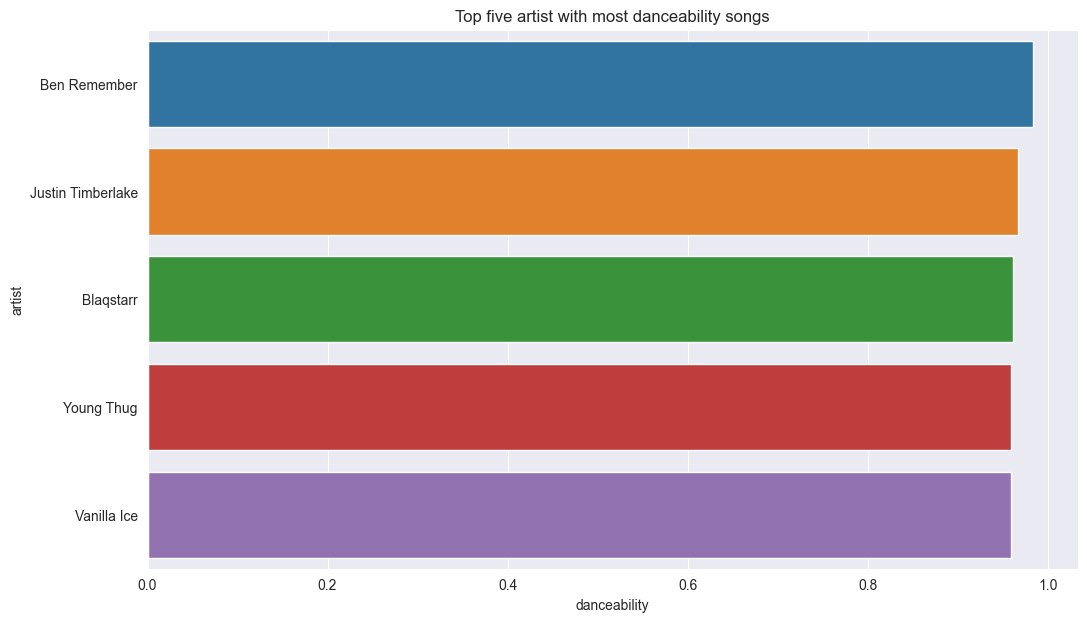

In [55]:
plt.figure(figsize=(12,7))
sns.barplot(data=top_5_artist_danceability,x='danceability',y='artist')
plt.title("Top five artist with most danceability songs")
plt.show()

## Top 5 instrumentalness track

In [60]:
top_5_instrumental_track=df[["instrumentalness","song_title","artist"]].sort_values(by="instrumentalness",ascending=False)[:5]
top_5_instrumental_track

,instrumentalness,song_title,artist
1313,0.976,Senseless Order,Signs of the Swarm
271,0.968,So Destroyed (channeling Rage Peace),Prince Rama
1575,0.964,A Hundred Dreams from Now,Ray Bryant
1619,0.958,Raven,John Dahlbäck
725,0.957,Strandbar (disko),Todd Terje


## Pie chart Visualization of Instrumentalnes

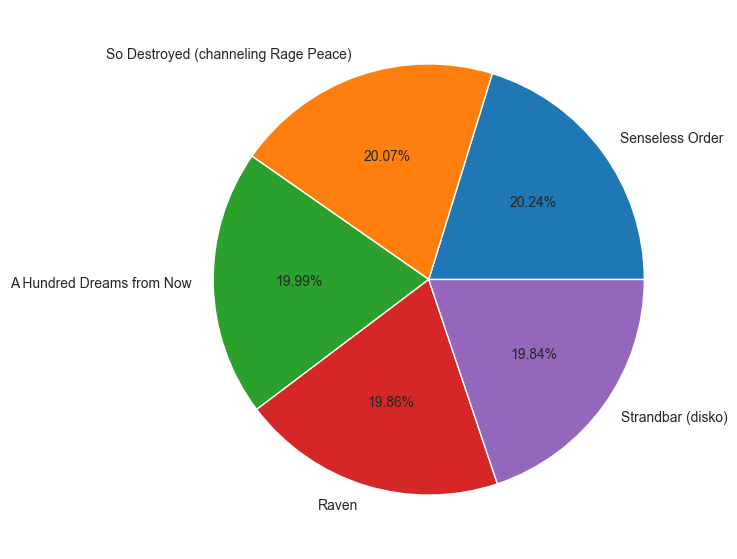

In [61]:
plt.figure(figsize=(12,7))
plt.pie(x='instrumentalness',data=top_5_instrumental_track,autopct='%1.2f%%',labels=top_5_instrumental_track.song_title)
plt.show()

In [62]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

## Multiple feature plots

In [63]:
interest_feature_columns=['acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness',
'valence','liveness','tempo','speechiness','loudness']

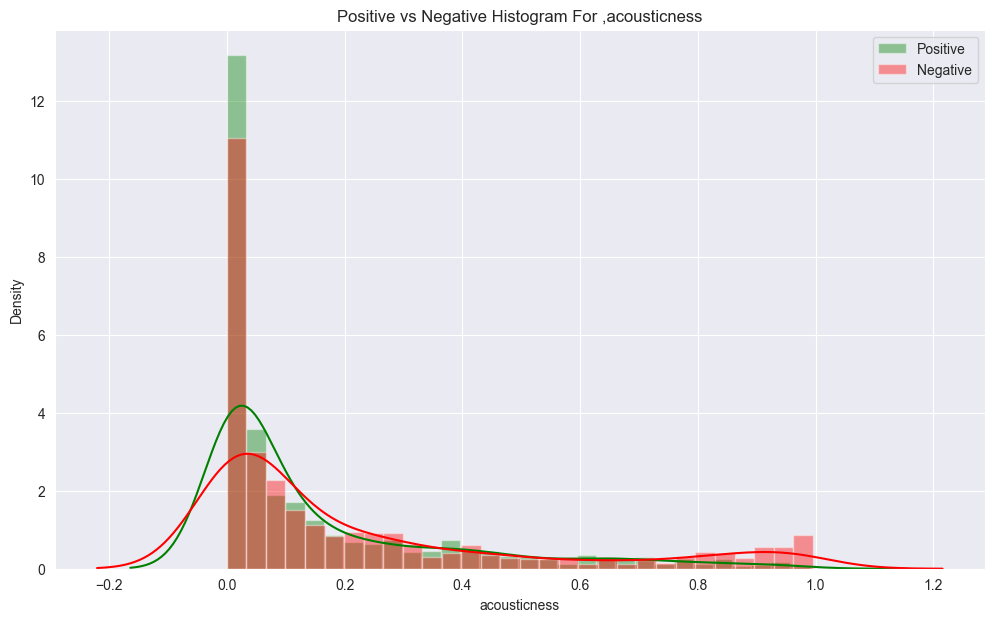

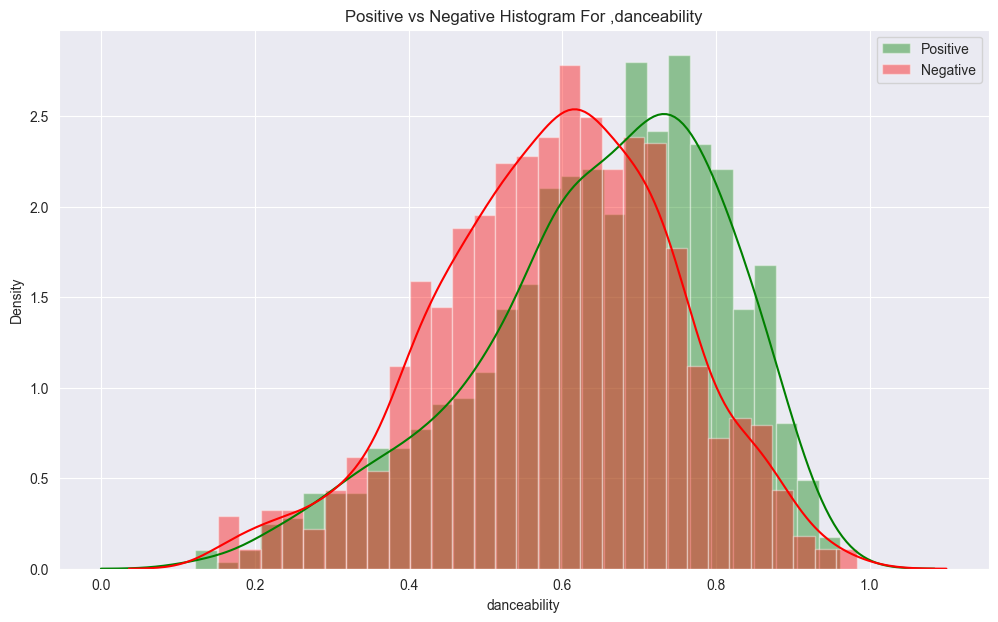

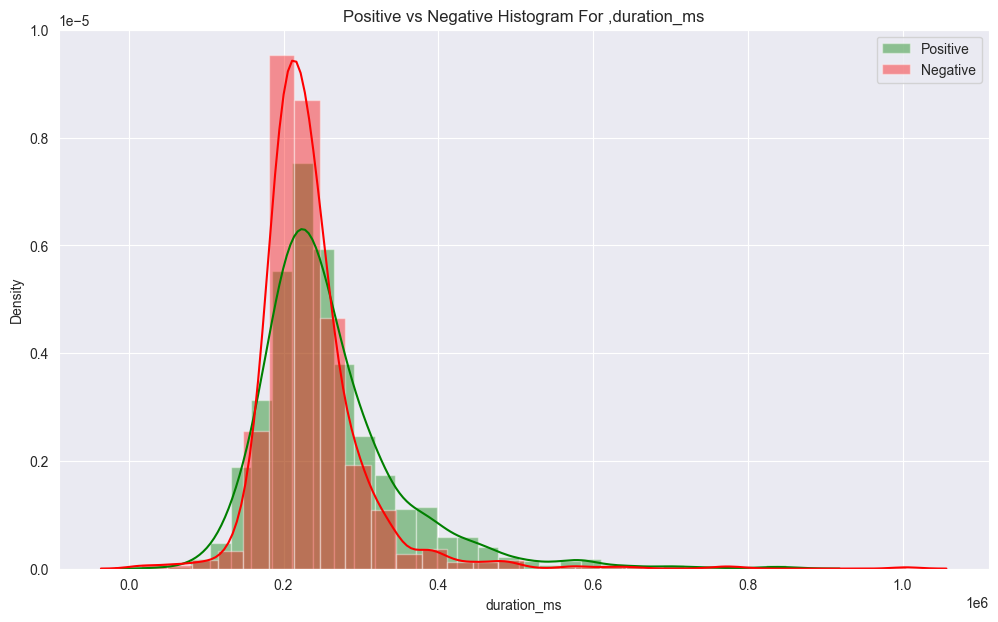

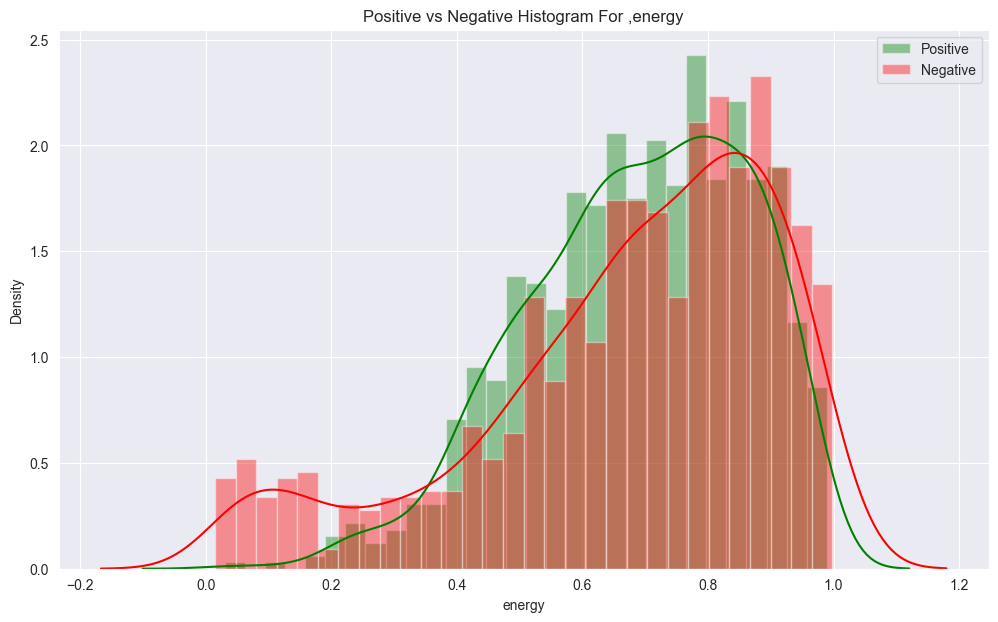

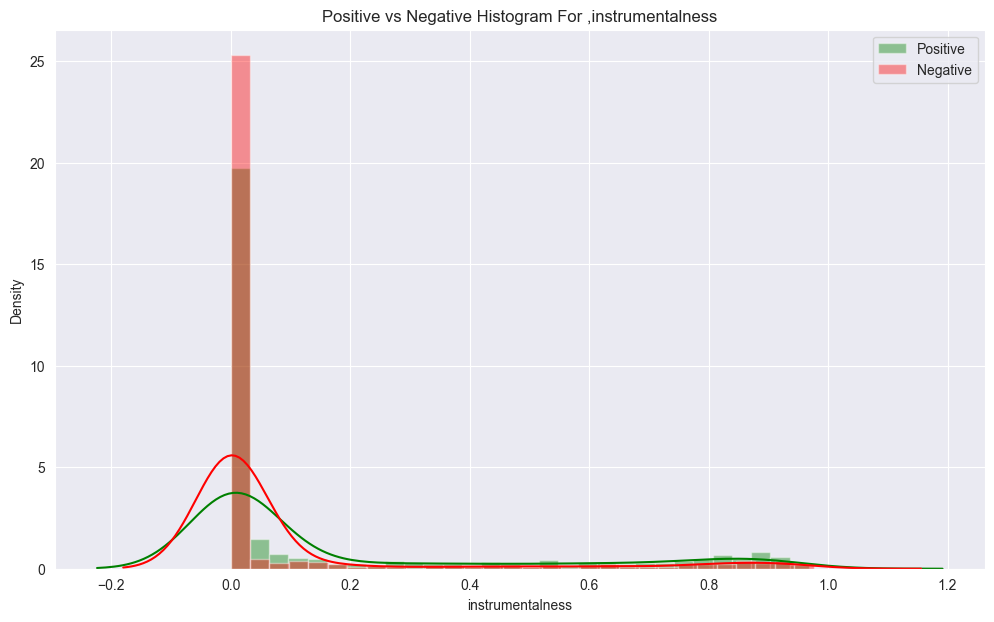

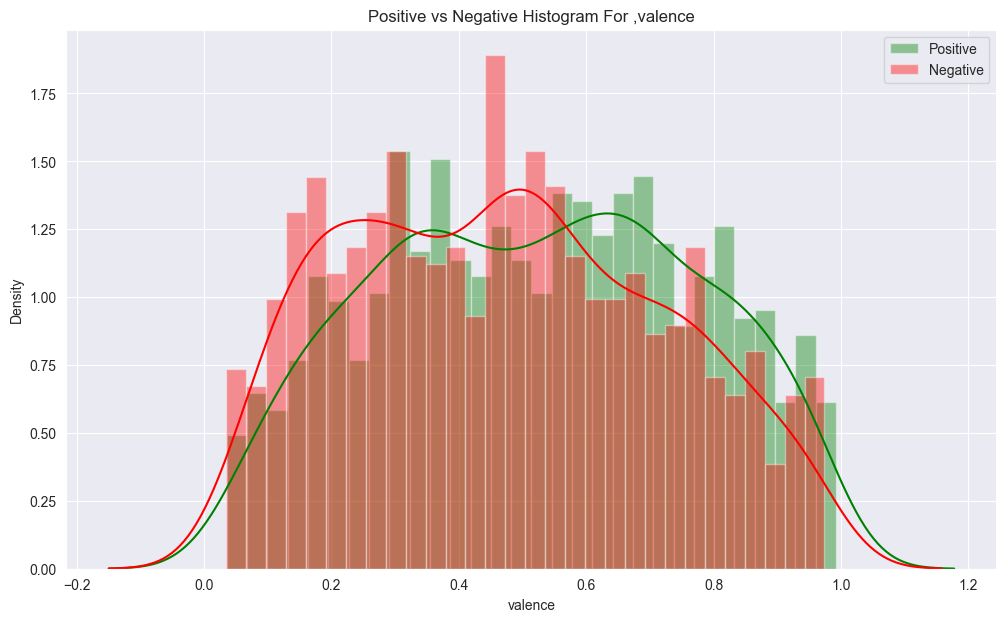

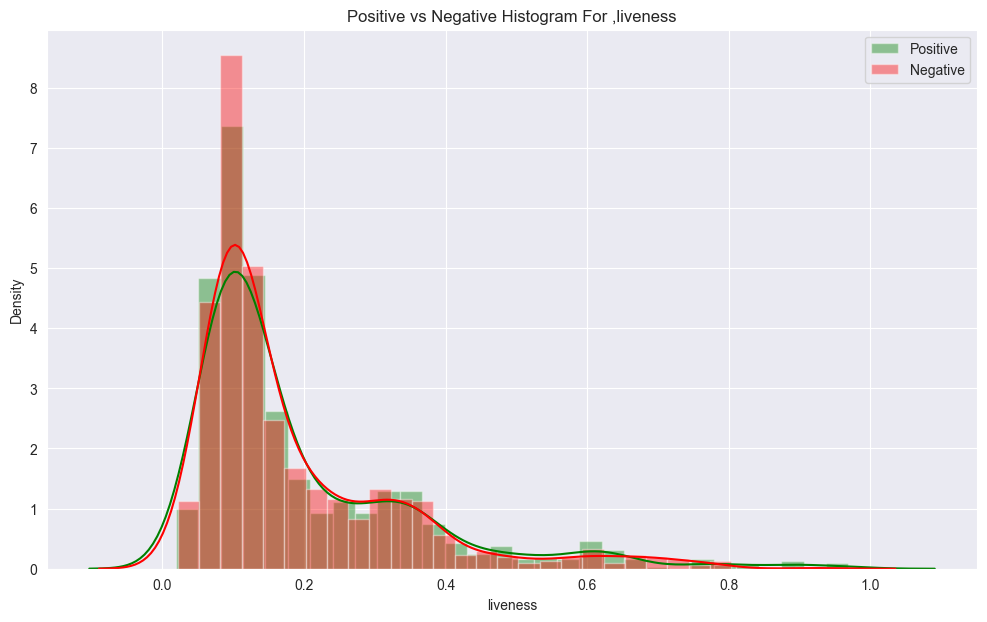

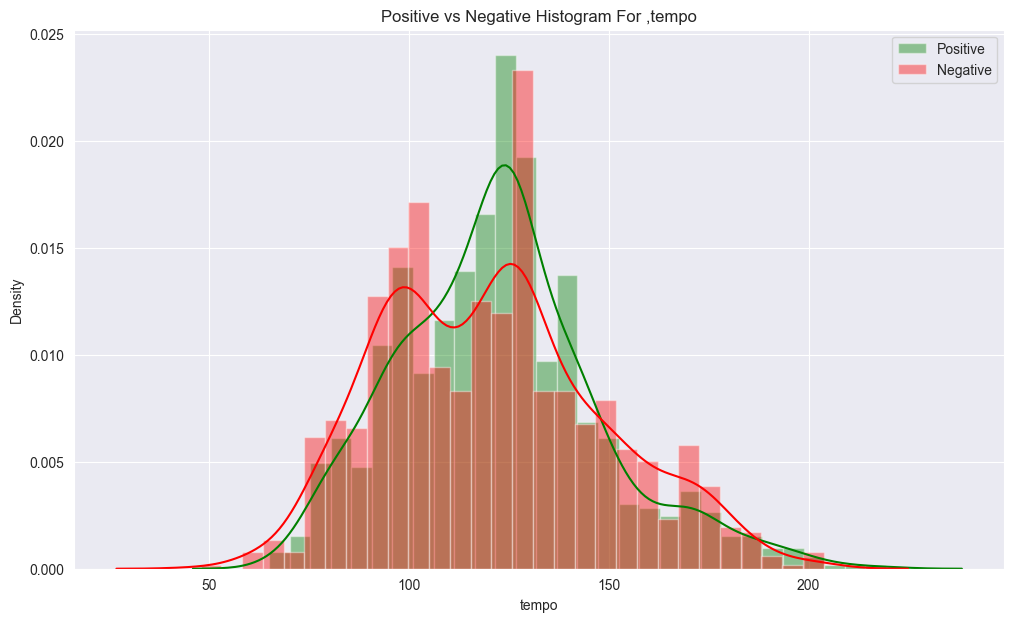

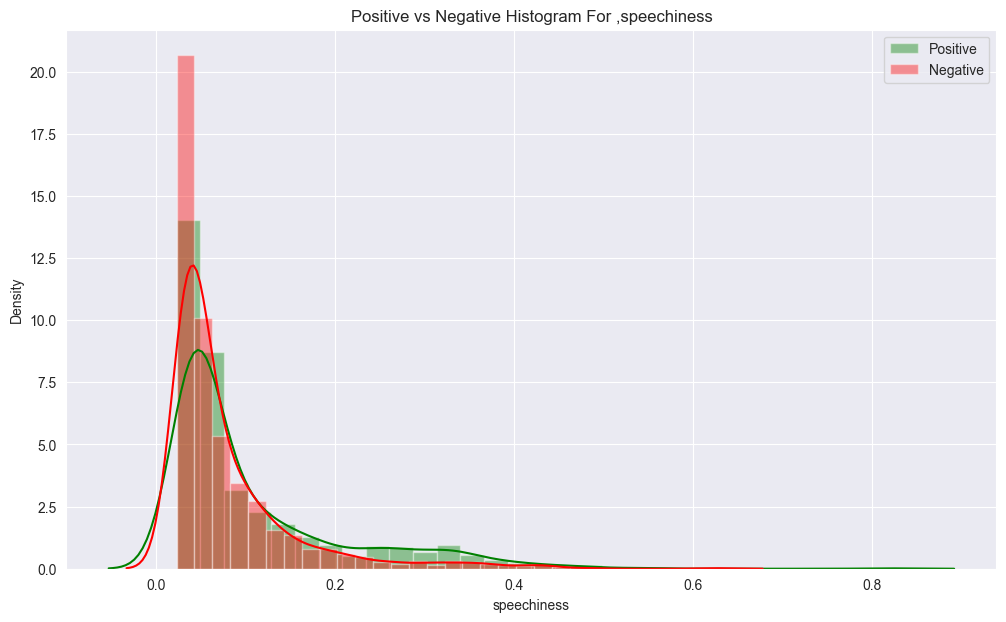

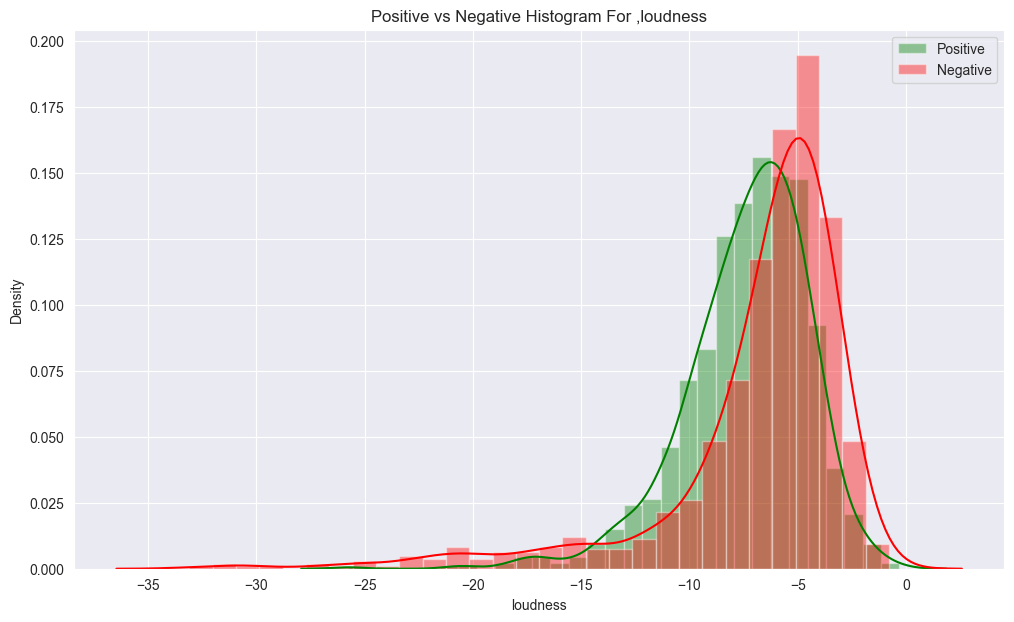

In [70]:
for feature_cols in interest_feature_columns:
    pos_data=df[df['target']==1][feature_cols]
    neg_data=df[df['target']==0][feature_cols]
    plt.figure(figsize=(12,7))

    sns.distplot(pos_data,bins=30,label='Positive',color='green')
    sns.distplot(neg_data,bins=30,label='Negative',color='red')

    plt.legend(loc='upper right')
    plt.title(f"Positive vs Negative Histogram For,{feature_cols}")
    plt.show()